# Import necessary libraries

In [27]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# `SVM` on Iris Dataset

In [10]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear')
# Fit the classifier on the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


# `SVM` hyper parameter tuing on Digits dataset

In [21]:
# Load the Digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'coef0': [-1, 0, 1]
}

# Create an SVM classifier
svc = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train an SVM model with the best hyperparameters
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_svc.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 10, 'coef0': -1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.9888888888888889


# Soft Margin SVM on Iris dataset

Accuracy: 0.8


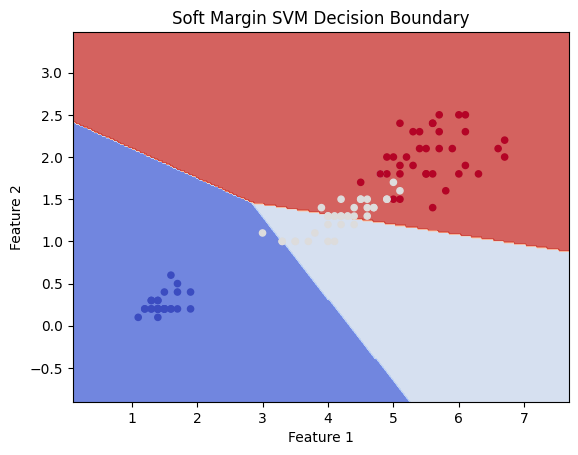

In [40]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Select the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LinearSVC classifier with a soft margin (C=1.0 is the default)
clf = LinearSVC(C=2.0, loss='hinge', max_iter=90000)  # Increase max_iter

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a meshgrid to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins using pcolormesh
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)
plt.title('Soft Margin SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
